In [1]:
import numpy as np
import pandas as pd
import math

from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1')
# df = df.drop(0)
# df = df.reset_index()
# df.drop('index',axis=1,inplace = True)

In [3]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

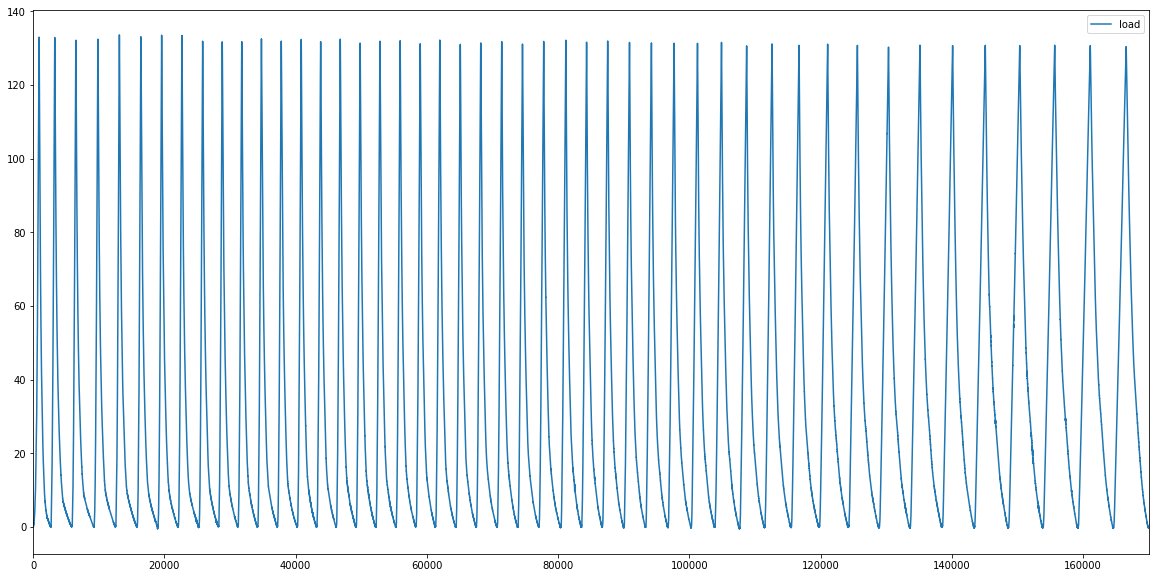

In [4]:
df.plot(y='load',figsize=(20,10))

In [5]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
# from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [8]:
# load the dataset
dataframe = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
dataframe.columns = ['time','load']
dataframe.drop('time',inplace=True,axis=1)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
print(trainX)
print(trainY)
print(testX)
print(testY)

[[ 0.00510896  0.00513869  0.00501389]
 [ 0.00513869  0.00501389  0.00465387]
 [ 0.00501389  0.00465387  0.00463382]
 ..., 
 [ 0.14653461  0.14634559  0.14615059]
 [ 0.14634559  0.14615059  0.14630482]
 [ 0.14615059  0.14630482  0.14601596]]
[ 0.00465387  0.00463382  0.00476131 ...,  0.14630482  0.14601596
  0.14576232]
[[ 0.14539874  0.1452316   0.14495875]
 [ 0.1452316   0.14495875  0.14516559]
 [ 0.14495875  0.14516559  0.14479588]
 ..., 
 [ 0.00475766  0.00476317  0.00499795]
 [ 0.00476317  0.00499795  0.00486085]
 [ 0.00499795  0.00486085  0.00498193]]
[ 0.14516559  0.14479588  0.14453802 ...,  0.00486085  0.00498193
  0.00505509]


In [13]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
6s - loss: 0.0057
Epoch 2/50
5s - loss: 1.2769e-05
Epoch 3/50
5s - loss: 6.2763e-06
Epoch 4/50
5s - loss: 5.8706e-06
Epoch 5/50
5s - loss: 5.5198e-06
Epoch 6/50
5s - loss: 5.1082e-06
Epoch 7/50
5s - loss: 4.5910e-06
Epoch 8/50
5s - loss: 4.0369e-06
Epoch 9/50
5s - loss: 3.2285e-06
Epoch 10/50
5s - loss: 2.5799e-06
Epoch 11/50
5s - loss: 2.0176e-06
Epoch 12/50
5s - loss: 1.6476e-06
Epoch 13/50
5s - loss: 1.4098e-06
Epoch 14/50
5s - loss: 1.1052e-06
Epoch 15/50
5s - loss: 8.8896e-07
Epoch 16/50
5s - loss: 8.1609e-07
Epoch 17/50
5s - loss: 6.7188e-07
Epoch 18/50
5s - loss: 5.8864e-07
Epoch 19/50
5s - loss: 5.6209e-07
Epoch 20/50
5s - loss: 4.7472e-07
Epoch 21/50
5s - loss: 5.3326e-07
Epoch 22/50
5s - loss: 4.7092e-07
Epoch 23/50
5s - loss: 4.8803e-07
Epoch 24/50
5s - loss: 4.5246e-07
Epoch 25/50
5s - loss: 5.1587e-07
Epoch 26/50
5s - loss: 4.5287e-07
Epoch 27/50
5s - loss: 4.4024e-07
Epoch 28/50
5s - loss: 4.6614e-07
Epoch 29/50
5s - loss: 4.4653e-07
Epoch 30/50
5s - loss: 4.65

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [16]:
trainX

array([[[ 0.00510896,  0.00513869,  0.00501389]],

       [[ 0.00513869,  0.00501389,  0.00465387]],

       [[ 0.00501389,  0.00465387,  0.00463382]],

       ..., 
       [[ 0.14653461,  0.14634559,  0.14615059]],

       [[ 0.14634559,  0.14615059,  0.14630482]],

       [[ 0.14615059,  0.14630482,  0.14601596]]], dtype=float32)

In [17]:
trainPredict

array([[ 0.00520275],
       [ 0.00476339],
       [ 0.00464699],
       ..., 
       [ 0.14614078],
       [ 0.14631307],
       [ 0.14617346]], dtype=float32)

In [18]:
testX

array([[[ 0.14539874,  0.1452316 ,  0.14495875]],

       [[ 0.1452316 ,  0.14495875,  0.14516559]],

       [[ 0.14495875,  0.14516559,  0.14479588]],

       ..., 
       [[ 0.00475766,  0.00476317,  0.00499795]],

       [[ 0.00476317,  0.00499795,  0.00486085]],

       [[ 0.00499795,  0.00486085,  0.00498193]]], dtype=float32)

In [19]:
testPredict

array([[ 0.14495341],
       [ 0.14513579],
       [ 0.14497301],
       ..., 
       [ 0.00519084],
       [ 0.00514756],
       [ 0.00510283]], dtype=float32)

In [20]:
trainX.shape
testX.shape

(56130, 1, 3)

In [21]:
trainPredict

array([[ 0.00520275],
       [ 0.00476339],
       [ 0.00464699],
       ..., 
       [ 0.14614078],
       [ 0.14631307],
       [ 0.14617346]], dtype=float32)

In [22]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [23]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting

Train Score: 0.06 RMSE
Test Score: 0.05 RMSE


In [24]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [25]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [26]:
# plot baseline and predictions
plt.figure(figsize=(15,15))

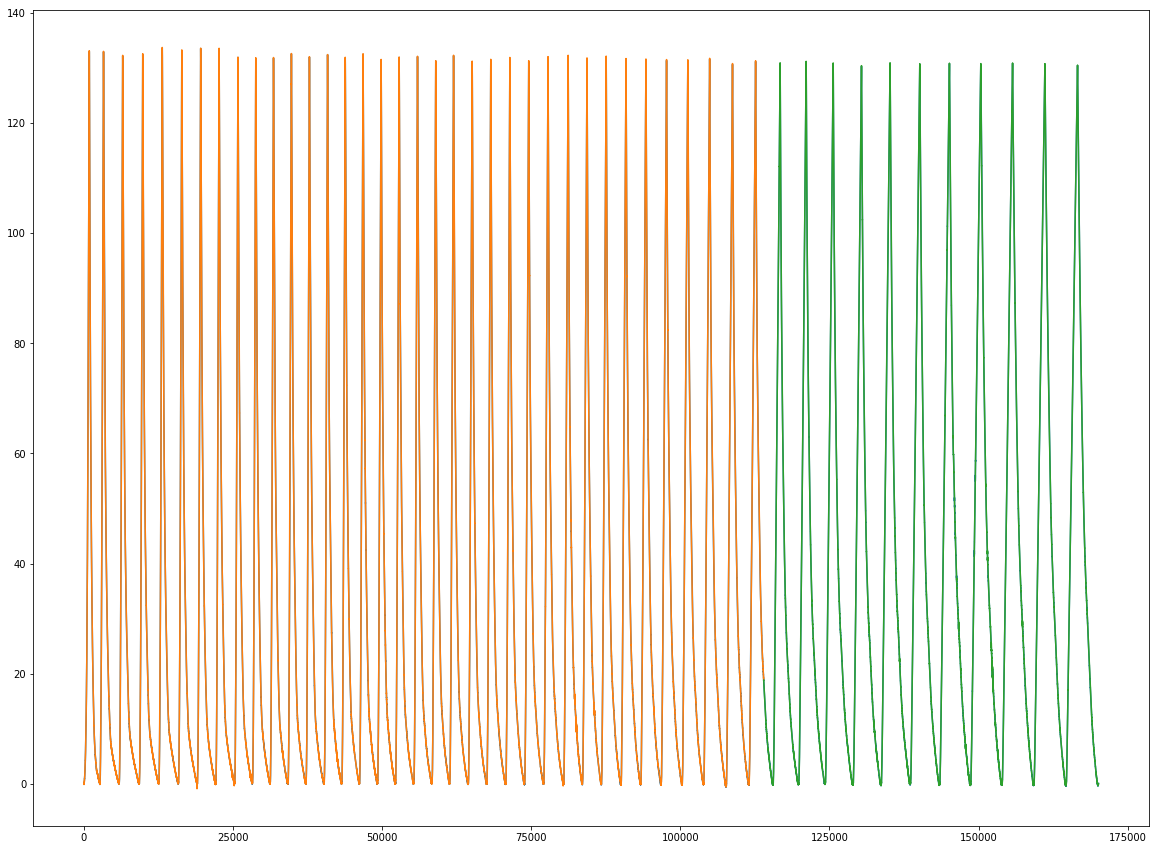

In [27]:
plt.figure(figsize=(20,15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('fig2.pdf')
plt.show()

In [28]:
# traindata.append()